In [2]:
# Importar bibliotecas essenciais
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Carregar dados
dados = pd.read_excel("C:/Users/pedro/Documents/DADOS/Analise IFood GPT/analise_logistica.xlsx")

# Exibir as primeiras linhas
print(dados.head())

# Verificar as informações gerais do dataset
print(dados.info())

   id_cliente       nome  idade genero          cidade data_adesao_clube  \
0           1  Cliente_1     58      F       São Paulo        2022-07-30   
1           2  Cliente_2     25      F        Salvador        2020-05-10   
2           3  Cliente_3     19      F       São Paulo        2021-09-29   
3           4  Cliente_4     65      F        Salvador        2021-06-30   
4           5  Cliente_5     35      M  Rio de Janeiro        2020-01-28   

    ano  mês  mes_ano plano_clube  ...  visitas  cancelamentos genero.1  \
0  2022    7  2022-07     Premium  ...        0              0        F   
1  2020    5  2020-05     Premium  ...        0              0        F   
2  2021    9  2021-09      Básico  ...        3              0        F   
3  2021    6  2021-06      Básico  ...        0              0        F   
4  2020    1  2020-01     Premium  ...        0              0        M   

         cidade.1  classificacao_idade  classificação_regiao  \
0       São Paulo           

In [32]:
# Substituir valores ausentes, se necessário
dados = dados.fillna(0)

# Selecionar features para o modelo
# Suponha que 'visitas_mensais', 'valor_total_mensal' sejam variáveis preditoras e 'cancelamentos' seja a variável alvo
X = dados[['tempo_vida_dias','LTV','total_valor']]
y = dados['cancelamentos']

In [33]:
# Dividir os dados em 80% treinamento e 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Criar o modelo de Regressão Logística
modelo = LogisticRegression()

# Treinar o modelo
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

Acurácia do modelo: 72.50%


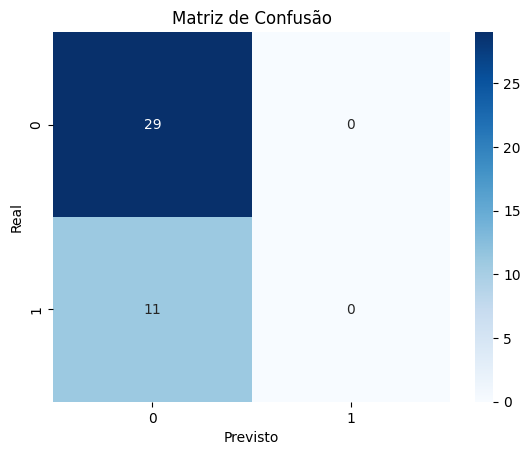

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        29
           1       0.00      0.00      0.00        11

    accuracy                           0.72        40
   macro avg       0.36      0.50      0.42        40
weighted avg       0.53      0.72      0.61        40



C:\Users\pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [35]:
# Calcular a acurácia do modelo
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {acuracia * 100:.2f}%")

# Matriz de Confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de Classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

<Axes: >

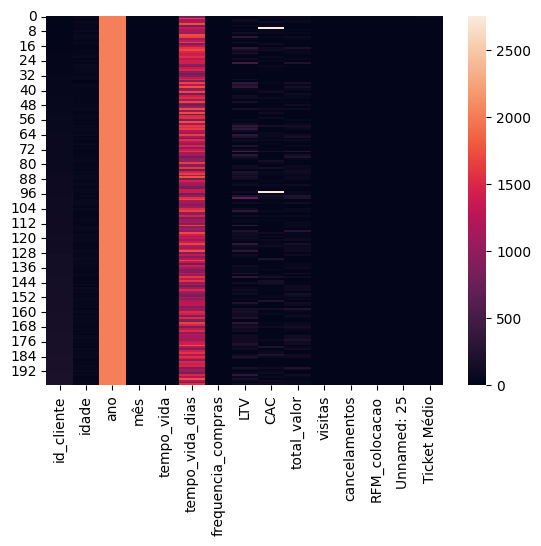

In [36]:
dados_cor= dados
#dados_cor= dados.drop("ultima_data_transacao",axis=1)
#dados_cor= dados.drop("data_adesao_clube",axis=1)
#dados_cor= dados.drop("nome",axis=1)
#dados_cor= dados.drop("genero",axis=1)

#somente colunas numericas
dados_cor = dados_cor.select_dtypes(include='number')


#dados_cor = dados_cor.corr()
#print(dados_cor)

plot = sns.heatmap(dados_cor)
plot

#pariplot = sns.pairplot(dados_cor)
#print(pariplot)
